<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/multiplication_pattern/multiplication_delta_-2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2_n20.csv',
 'data_multi_delta_-2_n30.csv',
 'data_multi_delta_-2_n60.csv',
 'data_multi_delta_-2_n120.csv',
 'data_multi_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,60.278256,76.547819,47.634878,-0.000073,194.460879,194.460943,-0.000065
1,0.0,1.0,94.676254,26.247452,50.154901,-0.001833,181.076773,181.078003,-0.001230
2,0.0,2.0,88.172991,36.015808,33.701472,-0.000308,167.889963,167.889789,0.000174
3,0.0,3.0,97.428584,59.817508,91.193760,-0.000339,258.439512,258.439426,0.000086
4,0.0,4.0,34.637083,36.066430,23.899447,0.000030,104.602989,104.602898,0.000091
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,96.486087,72.331927,90.963831,-0.000165,269.781680,269.781613,0.000067
19996,999.0,16.0,65.781987,35.508857,45.975066,-0.000548,157.265362,157.266159,-0.000798
19997,999.0,17.0,34.158442,24.826324,32.050295,0.001828,101.036887,101.035618,0.001269
19998,999.0,18.0,76.414526,39.971627,40.705479,0.000047,167.091678,167.091732,-0.000053


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,60.278256,76.547819,47.634878,-0.000073,194.460879,194.460943,-0.000065
1,0.0,1.0,94.676254,26.247452,50.154901,-0.001833,181.076773,181.078003,-0.001230
2,0.0,2.0,88.172991,36.015808,33.701472,-0.000308,167.889963,167.889789,0.000174
3,0.0,3.0,97.428584,59.817508,91.193760,-0.000339,258.439512,258.439426,0.000086
4,0.0,4.0,34.637083,36.066430,23.899447,0.000030,104.602989,104.602898,0.000091
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,96.486087,72.331927,90.963831,-0.000165,269.781680,269.781613,0.000067
19996,999.0,16.0,65.781987,35.508857,45.975066,-0.000548,157.265362,157.266159,-0.000798
19997,999.0,17.0,34.158442,24.826324,32.050295,0.001828,101.036887,101.035618,0.001269
19998,999.0,18.0,76.414526,39.971627,40.705479,0.000047,167.091678,167.091732,-0.000053


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    60.278256  76.547819  47.634878  ...  194.460879  194.460943 -0.000065
      1.0    94.676254  26.247452  50.154901  ...  181.076773  181.078003 -0.001230
      2.0    88.172991  36.015808  33.701472  ...  167.889963  167.889789  0.000174
      3.0    97.428584  59.817508  91.193760  ...  258.439512  258.439426  0.000086
      4.0    34.637083  36.066430  23.899447  ...  104.602989  104.602898  0.000091
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   96.486087  72.331927  90.963831  ...  269.781680  269.781613  0.000067
      16.0   65.781987  35.508857  45.975066  ...  157.265362  157.266159 -0.000798
      17.0   34.158442  24.826324  32.050295  ...  101.036887  101.035618  0.001269
      18.0   76.414526  39.971627  40.705479  ...  167.091678  167.091732 -0.000053
      19.0   73.223513  49.789793  72.878888  ...  205.892925  205.892324  0.000601

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    60.278256  76.547819  47.634878  ...  194.460879  194.460943 -0.000065
      1.0    94.676254  26.247452  50.154901  ...  181.076773  181.078003 -0.001230
      2.0    88.172991  36.015808  33.701472  ...  167.889963  167.889789  0.000174
      3.0    97.428584  59.817508  91.193760  ...  258.439512  258.439426  0.000086
      4.0    34.637083  36.066430  23.899447  ...  104.602989  104.602898  0.000091
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   96.486087  72.331927  90.963831  ...  269.781680  269.781613  0.000067
      16.0   65.781987  35.508857  45.975066  ...  157.265362  157.266159 -0.000798
      17.0   34.158442  24.826324  32.050295  ...  101.036887  101.035618  0.001269
      18.0   76.414526  39.971627  40.705479  ...  167.091678  167.091732 -0.000053
      19.0   73.223513  49.789793  72.878888  ...  205.892925  205.892324  0.000601

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,60.278256,76.547819,47.634878,-0.000073,194.460879,194.460943,-0.000065
1,0.0,1.0,94.676254,26.247452,50.154901,-0.001833,181.076773,181.078003,-0.001230
2,0.0,2.0,88.172991,36.015808,33.701472,-0.000308,167.889963,167.889789,0.000174
3,0.0,3.0,97.428584,59.817508,91.193760,-0.000339,258.439512,258.439426,0.000086
4,0.0,4.0,34.637083,36.066430,23.899447,0.000030,104.602989,104.602898,0.000091
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,96.486087,72.331927,90.963831,-0.000165,269.781680,269.781613,0.000067
19996,999.0,16.0,65.781987,35.508857,45.975066,-0.000548,157.265362,157.266159,-0.000798
19997,999.0,17.0,34.158442,24.826324,32.050295,0.001828,101.036887,101.035618,0.001269
19998,999.0,18.0,76.414526,39.971627,40.705479,0.000047,167.091678,167.091732,-0.000053


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    60.278256  76.547819  47.634878  ...  194.460879  194.460943 -0.000065
      1.0    94.676254  26.247452  50.154901  ...  181.076773  181.078003 -0.001230
      2.0    88.172991  36.015808  33.701472  ...  167.889963  167.889789  0.000174
      3.0    97.428584  59.817508  91.193760  ...  258.439512  258.439426  0.000086
      4.0    34.637083  36.066430  23.899447  ...  104.602989  104.602898  0.000091
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   96.486087  72.331927  90.963831  ...  269.781680  269.781613  0.000067
      16.0   65.781987  35.508857  45.975066  ...  157.265362  157.266159 -0.000798
      17.0   34.158442  24.826324  32.050295  ...  101.036887  101.035618  0.001269
      18.0   76.414526  39.971627  40.705479  ...  167.091678  167.091732 -0.000053
      19.0   73.223513  49.789793  72.878888  ...  205.892925  205.892324  0.000601

[20000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

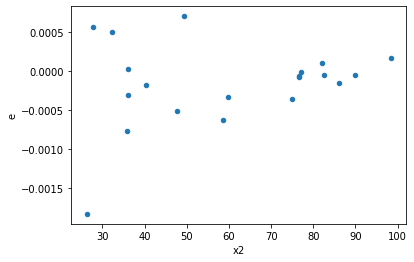

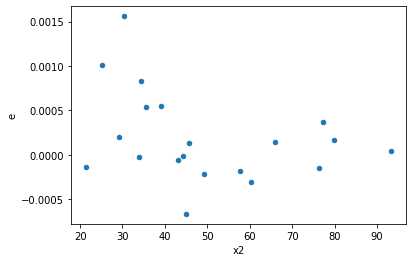

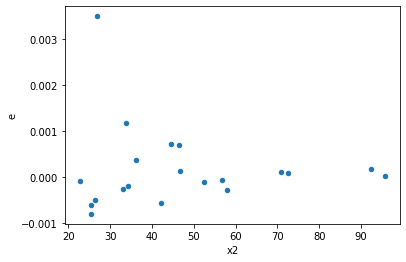

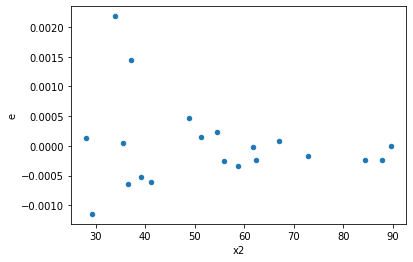

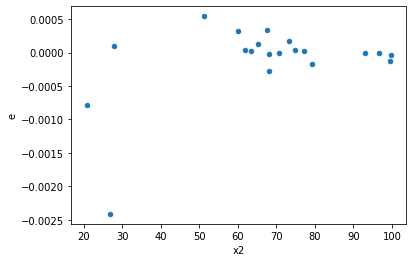

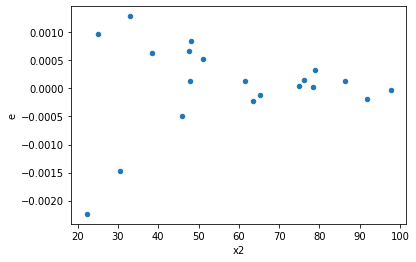

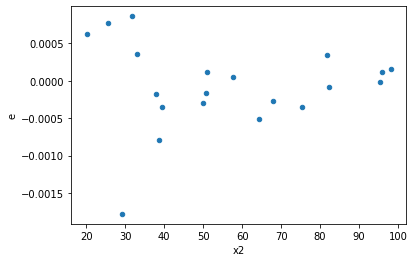

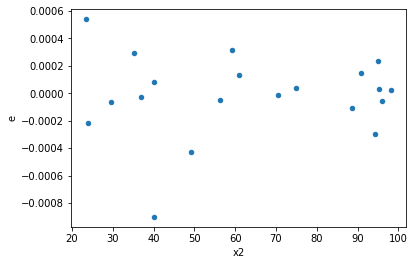

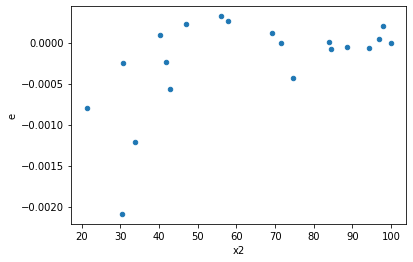

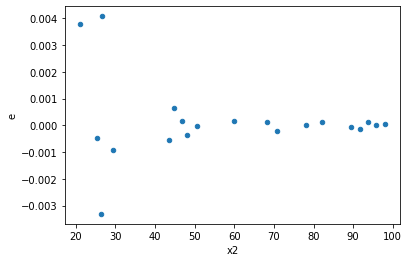

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
115.0,5.0,5.0,3.7943684554608744e-07,1.9951873114939195e-07,9.485921138652186e-08,4.987968278734799e-08,1.9017605182241244,0.4975331590671268,0.7512334204664366,Reject005=1 : Homoscedasticity
179.0,5.0,5.0,1.9760713261641248e-07,1.1642048290944396e-07,4.940178315410312e-08,2.910512072736099e-08,1.6973570945425338,0.5756196355522858,0.7121901822238571,Reject005=1 : Homoscedasticity
490.0,5.0,5.0,3.0097914782531197e-07,2.3310277023736545e-07,7.524478695632799e-08,5.827569255934136e-08,1.2911864904858443,0.7859837956165352,0.6070081021917324,Reject005=1 : Homoscedasticity
565.0,5.0,5.0,1.7000892272966569e-07,1.474732073451144e-07,4.250223068241642e-08,3.68683018362786e-08,1.1528122686842603,0.8797995027475913,0.5601002486262043,Reject005=1 : Homoscedasticity
926.0,5.0,5.0,6.806512738404944e-08,3.010069170453196e-08,1.701628184601236e-08,7.52517292613299e-09,2.261247949122762,0.3914299912473842,0.8042850043763079,Reject005=1 : Homoscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,4.407689877028843e-08,3.7307146671720884e-06,1.1019224692572108e-08,9.326786667930221e-07,0.011814599266499002,0.00015807707070396667,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,2.096321584591907e-07,1.1142201956556682e-06,5.2408039614797673e-08,2.7855504891391706e-07,0.18814248680516119,0.09059740294169348,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,5.278993237803597e-08,1.3213786417784755e-05,1.3197483094508992e-08,3.3034466044461887e-06,0.003995064753505076,1.0805760917282927e-05,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,8.7813865695259e-08,4.402171645364325e-06,2.195346642381475e-08,1.1005429113410813e-06,0.019947851371886136,0.0005690657537820842,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,6.072446048407481e-08,2.465483789415396e-06,1.5181115121018703e-08,6.16370947353849e-07,0.024629835630950756,0.0009483906000471347,Reject005=0 : Heteroscedasticity
5.0,5.0,5.0,1.239203692718469e-07,6.672735432414777e-06,3.098009231796172e-08,1.6681838581036943e-06,0.018571149797108277,0.0004782007874463944,Reject005=0 : Heteroscedasticity
6.0,5.0,5.0,1.1852841499769918e-07,2.888268062855295e-06,2.9632103749424795e-08,7.220670157138237e-07,0.04103788582577889,0.0032116711457644003,Reject005=0 : Heteroscedasticity
7.0,5.0,5.0,6.597266935227307e-08,8.120859081295955e-07,1.6493167338068268e-08,2.0302147703239886e-07,0.08123853485430131,0.015478976566079746,Reject005=0 : Heteroscedasticity
8.0,5.0,5.0,6.379452467493697e-08,1.908329102827441e-06,1.594863116873424e-08,4.770822757068602e-07,0.03342951935303873,0.001974382912093128,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    890
Reject005=1 : Homoscedasticity      110
Name: Result_test, dtype: int64